In [2]:
import tensorflow as tf
import os


/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def load_dataset(directory, label):
    data = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r') as file:
            review = file.read()
            data.append((review, label))
    return data

directory_path = "/Users/mrbinit/Downloads/aclImdb" 

train_pos_dir = os.path.join(directory_path, 'train', 'pos')
train_neg_dir = os.path.join(directory_path, 'train', 'neg')
test_pos_dir = os.path.join(directory_path, 'test', 'pos')
test_neg_dir = os.path.join(directory_path, 'test', 'neg')
val_pos_dir = os.path.join(directory_path, 'val', 'pos')
val_neg_dir = os.path.join(directory_path, 'val', 'neg')

train_data = load_dataset(train_pos_dir, 1) + load_dataset(train_neg_dir, 0) #1 represents positive and 0 represents negative sentiments
test_data = load_dataset(test_pos_dir, 1) + load_dataset(test_neg_dir, 0)

#split the test set into a validation set (15,000 samples) and a test set (10,000 samples)
val_data = test_data[:15000]
test_data = test_data[15000:25000]

#separate the reviews and labels from the train, test, and validation data
train_reviews, train_labels = zip(*train_data)
test_reviews, test_labels = zip(*test_data)
val_reviews, val_labels = zip(*val_data)

#check the lengths of train, test, and validation datasets
train_length = len(train_reviews)
test_length = len(test_reviews)
val_length = len(val_reviews)

print("Train dataset length:", train_length)
print("Test dataset length:", test_length)
print("Validation dataset length:", val_length)


Train dataset length: 25000
Test dataset length: 10000
Validation dataset length: 15000


In [4]:
print("Train Data:", train_reviews[:5])  
print("Test Data:", test_reviews[:5])   
print("Validation Data:", val_reviews[:5])

Train Data: ('For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.', 'Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D\'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily p

#91% accuracy wiht over fitting

In [5]:
#Regular expressions (regex) are sequences of characters that define a search pattern. They are used for string manipulation, searching, and pattern matching within text. 
import re
def has_html_tags(text):
    pattern = re.compile(r'<[^>]+>')  # Regular expression to match HTML tags
    return bool(pattern.search(text))

# Check for HTML tags in each dataset
def check_html_tags(dataset):
    for review, _ in dataset:
        if has_html_tags(review):
            return True
    return False

#check for HTML tags in each dataset
train_has_html = check_html_tags(train_data)
test_has_html = check_html_tags(test_data)
val_has_html = check_html_tags(val_data)
#print output
print("Train dataset contains HTML tags:", train_has_html)
print("Test dataset contains HTML tags:", test_has_html)
print("Validation dataset contains HTML tags:", val_has_html)


Train dataset contains HTML tags: True
Test dataset contains HTML tags: True
Validation dataset contains HTML tags: True


In [6]:
def has_url(text):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(pattern.search(text))

#condition to check for url
def check_for_urls(dataset):
    for review, _ in dataset:
        if has_url(review):
            return True
    return False
#check whether there is URL or not
train_has_url = check_for_urls(train_data)
test_has_url = check_for_urls(test_data)
val_has_url = check_for_urls(val_data)

print("Train dataset contains URLs:", train_has_url)
print("Test dataset contains URLs:", test_has_url)
print("Validation dataset contains URLs:", val_has_url)

Train dataset contains URLs: True
Test dataset contains URLs: True
Validation dataset contains URLs: True


In [7]:
def has_special_characters(text):
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return bool(pattern.search(text))

def check_for_special_characters(dataset):
    for review, _ in dataset:
        if has_special_characters(review):
            return True
    return False

train_has_special_chars = check_for_special_characters(train_data)
test_has_special_chars = check_for_special_characters(test_data)
val_has_special_chars = check_for_special_characters(val_data)
print("Train dataset contains special characters:", train_has_special_chars)
print("Test dataset contains special characters:", test_has_special_chars)
print("Validation dataset contains special characters:", val_has_special_chars)


Train dataset contains special characters: True
Test dataset contains special characters: True
Validation dataset contains special characters: True


In [8]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
import contractions
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mrbinit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mrbinit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mrbinit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
def preprocess_text(text):
    #remove  HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    #remove urls
    text = re.sub(r'http\S+', '', text)

    #expand contractions 
    text = contractions.fix(text)

    #tokenize 
    tokens = word_tokenize(text)

    #remove non-alphabetic tokens and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]

    #remove stopwords 
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    #lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

In [10]:
#preprocess all the data
train_reviews_processed = [preprocess_text(review) for review in train_reviews]
test_reviews_processed = [preprocess_text(review) for review in test_reviews]
val_reviews_processed = [preprocess_text(review) for review in val_reviews]


/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_996/1364098993.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [11]:
print("Cleaned Train Data:", train_reviews_processed[:5])  
print("Cleaned Test Data:", test_reviews_processed[:5])   
print("Cleaned Validation Data:", val_reviews_processed[:5])

Cleaned Train Data: [['movie', 'get', 'respect', 'sure', 'lot', 'memorable', 'quote', 'listed', 'gem', 'imagine', 'movie', 'joe', 'piscopo', 'actually', 'funny', 'maureen', 'stapleton', 'scene', 'stealer', 'moroni', 'character', 'absolute', 'scream', 'watch', 'alan', 'skipper', 'hale', 'police', 'sgt'], ['bizarre', 'horror', 'movie', 'filled', 'famous', 'face', 'stolen', 'cristina', 'raines', 'later', 'tv', 'flamingo', 'road', 'pretty', 'somewhat', 'unstable', 'model', 'gummy', 'smile', 'slated', 'pay', 'attempted', 'suicide', 'guarding', 'gateway', 'hell', 'scene', 'raines', 'modeling', 'well', 'captured', 'mood', 'music', 'perfect', 'deborah', 'raffin', 'charming', 'cristina', 'pal', 'raines', 'move', 'creepy', 'brooklyn', 'height', 'brownstone', 'inhabited', 'blind', 'priest', 'top', 'floor', 'thing', 'really', 'start', 'cooking', 'neighbor', 'including', 'fantastically', 'wicked', 'burgess', 'meredith', 'kinky', 'couple', 'sylvia', 'mile', 'beverly', 'diabolical', 'lot', 'eli', 'wa

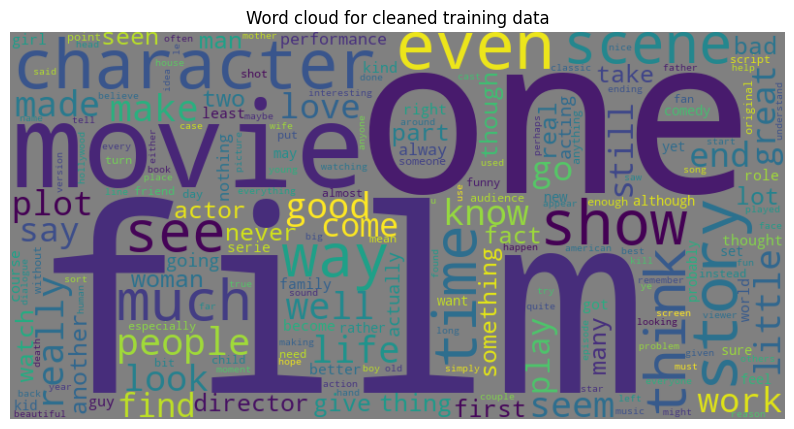

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#join the preprocessed text in single string as during preprocessing the data each word had separate string and this step is necessary for generating word cloud 
cleaned_text_train = ' '.join([' '.join(review) for review in train_reviews_processed])


# Generate word clouds
wordcloud_train = WordCloud(width=800, height=400, background_color='grey').generate(cleaned_text_train)

# Plot word clouds
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title("Word cloud for cleaned training data")
plt.axis('off')
plt.show()


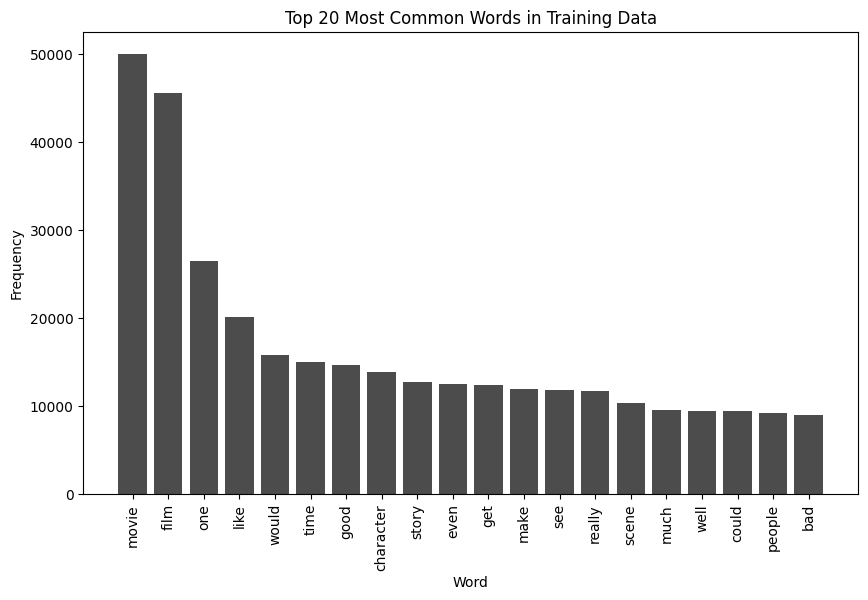

In [23]:
from collections import Counter

#count word frequencies in the preprocessed text
word_freq_train = Counter(cleaned_text_train.split())

#sort the word frequencies by counts in descending order
sorted_word_freq_train = dict(sorted(word_freq_train.items(), key=lambda item: item[1], reverse=True))

#plot histograms
plt.figure(figsize=(10, 6))
plt.bar(list(sorted_word_freq_train.keys())[:20], list(sorted_word_freq_train.values())[:20], color='black', alpha=0.7)
plt.title('Top 20 Most Common Words in Training Data')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()





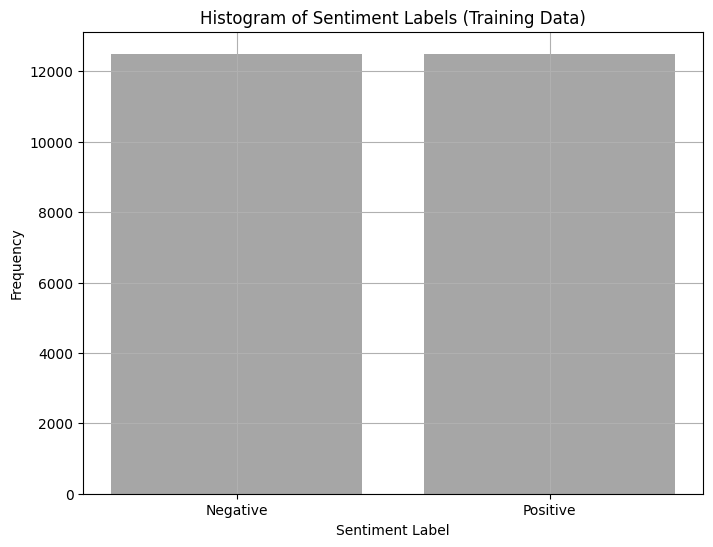

In [20]:
# Count the occurrences of each sentiment label in the training dataset
train_sentiment_counts = Counter(train_labels)

# Plot histogram for training data sentiment labels
plt.figure(figsize=(8, 6))
plt.bar(train_sentiment_counts.keys(), train_sentiment_counts.values(), color='grey', alpha=0.7)
plt.title('Histogram of Sentiment Labels (Training Data)')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()

In [ ]:
import gensim
import numpy as np

In [ ]:
#train Word2Vec model 
word2vec_model = gensim.models.Word2Vec(sentences = train_reviews_processed + test_reviews_processed + val_reviews_processed, vector_size = 100, window= 5, min_count = 5, workers = 4)

#function to get vector representation of a sentence
def get_sentence_vector(tokens):
    vector = np.zeros((100,))
    count = 0 
    for word in tokens:
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1

        if count  != 0:
            vector /= count 
        return count
    
#get sentence vector for all the dataset 
train_vectors = [get_sentence_vector(tokens) for tokens in train_reviews_processed]
test_vectors = [get_sentence_vector(tokens) for tokens in test_reviews_processed]
val_vectors = [get_sentence_vector(tokens) for tokens in val_reviews_processed]


In [ ]:
#convert lists to numpy arrays 

X_train = np.array(train_vectors)
X_test = np.array(test_vectors)
X_val = np.array(val_vectors)


y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_val = np.array(val_labels)